## 식습관 데이터를 자원 축소시켜서 시각화하기
- 고차원 데이터를 1차원 데이터로 줄여서 시각화 해보는 실습.

In [1]:
import pandas as pd

## 데이터 획득
- 주성분 분석을 실습하기 위한 데이터를 만들어 보겠습니다.
- 사람들의 하루 식습관 데이터를 만든 후, 주성분 분석을 사용하여 데이터를 시각화
- 먼저 칼로리, 아침, 점심, 저녁, 운동횟수, 그리고 체형이라는 특징을 가진 데이터프레임을 생성.

In [2]:
df =pd.DataFrame(columns=['calory','breakfast','lunch','dinner','excercise','body_shape'])

In [3]:
# 10명의 가공데이터를 만들기

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

df

,calory,breakfast,lunch,dinner,excercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


## 데이터 전처리
- 주성분 분석을 위해 데이터 전처리 과정 필요
- 우선 가공 데이터에 데이터 특징과 클래스가 함께있으므로, 데이터의 특징만으로 구성된 X데이터 프레임 생성

In [4]:
X = df[['calory','breakfast','lunch','dinner','excercise']]
X

,calory,breakfast,lunch,dinner,excercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0
9,3000,1,2,1,1


In [5]:
Y = df[['body_shape']]
Y

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


### 데이터 표준화 
- 데이터의 특징들이 수치이기 하지만, 각각의 범위가 다르므로, 범위를 통일 시켜 줍니다.
- 데이터를 표준화 함으로써, 머신러닝 알고리즘 범위가 넓은 데이터에 중점을 두는 현상이 줄고, 정확도가 높아집니다.

In [6]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

## 공분산 행렬 구하기
- 주성분 분석을 위해 먼저 특성들의 공분산 행렬을 구해야 합니다.

In [7]:
import numpy as np

In [8]:
features = x_std.T # 행렬 변환
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


## 고유값(eigen value) 고유벡터(eigen vector) 구하기

In [13]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print(eig_vecs, '\n')
print(eig_vals, '\n')

[[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]] 

[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ] 



In [14]:
# 가장 큰 고유 벡터의 정보 함유량을 찾는다.
eig_vals[0] / sum (eig_vals)  # 가장 큰 고유 벡터가 73% 함유
                              # 5차원 -> 가장 큰 고유벡터로 1차원 축소

0.7318321731427543

### 5차원의 데이터를 고유벡터로 사용 시키기
- a벡터를 b벡터에 사용할때 공식 = dot(a, b) / magnitude of b

In [16]:
projected_X = x_std.dot(eig_vecs.T[0]) / np.linalg.norm(eig_vecs.T[0])
projected_X

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

### 시각화
- 1차원으로 축소된 데이터를 시각화 하기 위해서, 판다스 데이터프레임에 데이터를 담습니다.
- 주성분(PC1)을 X축으로 하고, 1차원 데이터이므로 y축은 0으로 통일 시킵니다.
- 데이터의 쉬운 이해를 위해 클래스를 데이터 마지막 컬럼에 포함시킵니다.

In [17]:
result = pd.DataFrame(projected_X, columns = ['PC1'])
result['y-axis'] = 0.0
result['label'] = Y
result

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


Text(0.5, 1.0, 'PCA result')

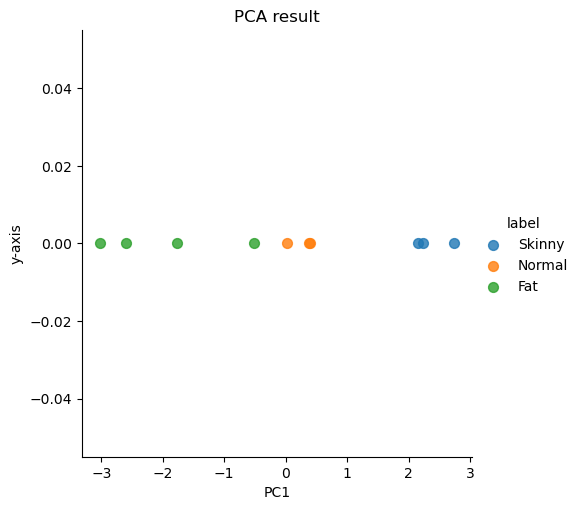

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='PC1',y='y-axis', data = result, fit_reg=False,scatter_kws={'s':50}, hue = 'label')
plt.title('PCA result')

## scikit-learn을 이용한 주성분 분석 구현

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)